In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
#reading dataset into dataframe as data1
data1 = pd.read_csv("vaccinations.csv")
data1.head(5)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


In [3]:
#checking dimention of data1
data1.shape
#CHECKING FOR NULL VALUES in data1
data1.isnull().sum()
# filling na values
data1 = data1.fillna(0)
data1
#CHECKING FOR NULL VALUES IN EACH COLUMNS
data1.isnull().sum()
#CHECKING COUNT OF UNIQUE VALUES IN COLUMNS
data1['date'].value_counts()
#DROPPING THE locations and ISO code COLUMNs FROM data1
data1.drop(['location','iso_code'], axis=1, inplace=True)
data1.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,2021-02-23,0.0,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,0.0,34.0,1367.0,0.003
2,2021-02-24,0.0,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,0.0,34.0,1367.0,0.003
3,2021-02-25,0.0,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,0.0,34.0,1367.0,0.003
4,2021-02-26,0.0,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,0.0,34.0,1367.0,0.003


In [4]:
data1.shape

(121085, 14)

In [5]:
#finding list of numerical value columns into list num_col
num_col = [i for i in data1.columns if data1.dtypes[i]!='object']
num_col

['total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters_per_hundred',
 'daily_vaccinations_per_million',
 'daily_people_vaccinated',
 'daily_people_vaccinated_per_hundred']

In [6]:
#sorting dataframe by Date in ascending order
data1 = data1.sort_values(by = 'date')
data1

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
81360,2020-12-02,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
35197,2020-12-02,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
118992,2020-12-02,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
46703,2020-12-02,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
35198,2020-12-03,0.000000e+00,0.0,0.0,0.0,1.0,1.0,0.00,0.00,0.00,0.00,0.0,1.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,2022-08-17,3.428933e+09,0.0,0.0,0.0,346000.0,285000.0,240.48,0.00,0.00,0.00,200.0,0.0,0.000
110021,2022-08-17,1.578603e+06,752658.0,716020.0,167832.0,113.0,82.0,103.47,49.33,46.93,11.00,54.0,24.0,0.002
28247,2022-08-17,1.783931e+07,6971018.0,6885372.0,4393900.0,6136.0,4232.0,169.72,66.32,65.51,41.80,403.0,74.0,0.001
5800,2022-08-17,1.729790e+05,89622.0,83357.0,0.0,13.0,16.0,162.37,84.12,78.24,0.00,150.0,7.0,0.007


In [7]:
#grouping dataframe by Date and summing them date wise data1 as data2
data2 = data1.groupby(['date'], as_index = False).sum()
data2

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,2020-12-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
1,2020-12-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.0,4.0,0.00,0.00,0.00,0.00,0.0,4.0,0.000
2,2020-12-04,5.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,3.0,4.0,0.00,0.00,0.00,0.00,0.0,4.0,0.000
3,2020-12-05,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,3.0,4.0,0.00,0.00,0.00,0.00,0.0,4.0,0.000
4,2020-12-06,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,3.0,4.0,0.00,0.00,0.00,0.00,0.0,4.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2022-08-13,4.561673e+10,1.796389e+10,1.655188e+10,7.959856e+09,3372843.0,4479354.0,10891.63,3948.90,3549.96,2714.13,49029.0,243059.0,0.354
620,2022-08-14,4.662298e+10,1.838548e+10,1.694205e+10,8.162609e+09,3026220.0,4406790.0,10866.35,3964.03,3711.68,2669.01,47738.0,240524.0,0.369
621,2022-08-15,4.610071e+10,1.814644e+10,1.672720e+10,8.090470e+09,3168829.0,4068530.0,11309.45,4256.29,4005.78,2669.75,41589.0,179540.0,0.313
622,2022-08-16,4.577436e+10,1.806398e+10,1.664827e+10,7.989660e+09,1863185.0,3432644.0,9158.33,3599.84,3358.83,2202.90,23560.0,138713.0,0.162


In [8]:
#copying the date column
col_date = data2['date'].copy()

In [10]:
len(num_col)
np.random.seed(10)
#now we make our dataframe data2 continuous by adding random number using unniform(0,1) and name it as added_df
added_df = data2.iloc[:,1:].add(np.random.rand(624, 13))
added_df
#adding col_date column in added_df dataframe at right most column
added_df['Date'] = col_date
added_df
#making list  of column names of added_df dataframe as cols
cols=list(added_df.columns)
#taking total_vaccinations and date columns in new dataframe df_date_tot to fit the model in this dataframe to forecast total_vaccinations
df_date_tot = added_df[[cols[4]] + [cols[-1]]]
df_date_tot

,daily_vaccinations_raw,Date
0,4.985070e-01,2020-12-02
1,3.291876e+00,2020-12-03
2,3.805223e+00,2020-12-04
3,3.856850e+00,2020-12-05
4,3.987625e+00,2020-12-06
...,...,...
619,3.372843e+06,2022-08-13
620,3.026221e+06,2022-08-14
621,3.168830e+06,2022-08-15
622,1.863185e+06,2022-08-16


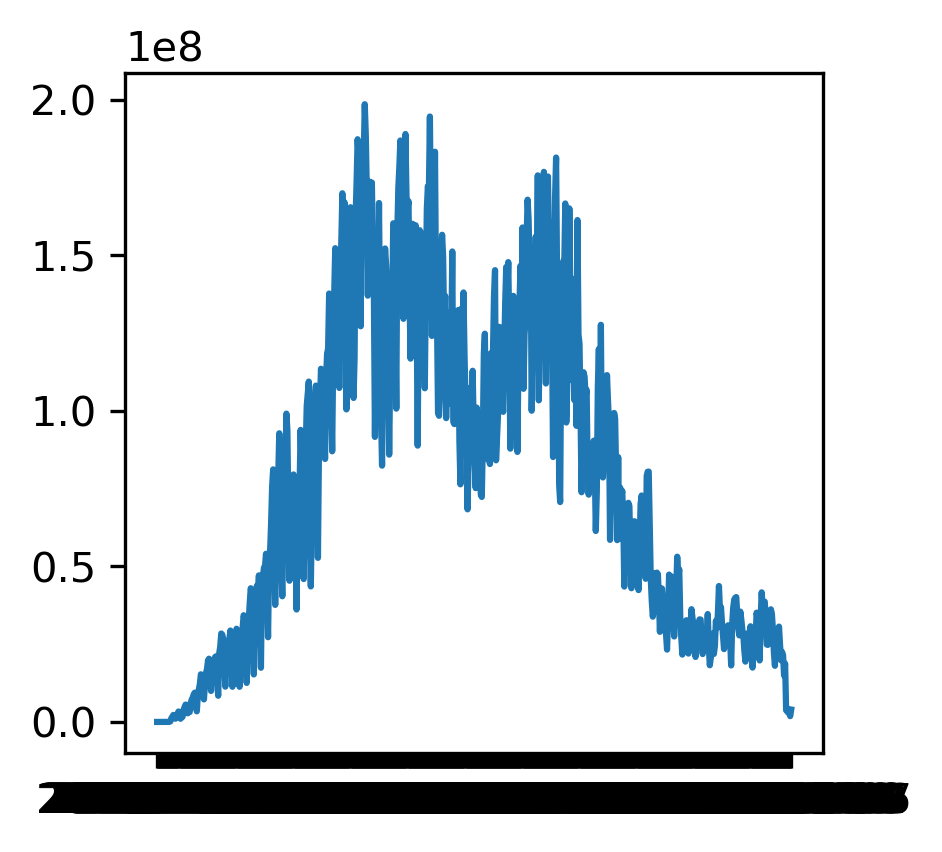

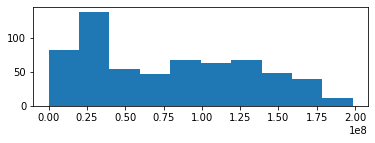

In [12]:
#plotting the df_date_tot dataframe date vs total_vaccinations all over the wworld
plt.figure(figsize=(3,3),dpi=300)
plt.plot(df_date_tot['Date'],df_date_tot['daily_vaccinations_raw'])
plt.show()
plt.subplot(212)
plt.hist(df_date_tot['daily_vaccinations_raw'])
plt.show()


In [13]:
# splitting dataframe by row index into two parts
part_1 = df_date_tot.iloc[:111,:]
part_2 = df_date_tot.iloc[111:,:]
df_date_tot.describe()

,daily_vaccinations_raw
count,6.240000e+02
mean,7.792312e+07
std,5.310782e+07
min,4.985070e-01
25%,2.936874e+07
50%,7.522756e+07
75%,1.245709e+08
max,1.985537e+08


In [14]:
part_1.shape

(111, 2)

In [15]:
part_2.shape

(513, 2)

In [16]:
part_1.var()

daily_vaccinations_raw    2.201429e+14
dtype: float64

In [17]:
part_2.var()

daily_vaccinations_raw    2.413790e+15
dtype: float64

In [18]:
df_daily_vaccinations = df_date_tot.copy()
df_daily_vaccinations.shape


(624, 2)

Lambda: 0.446457


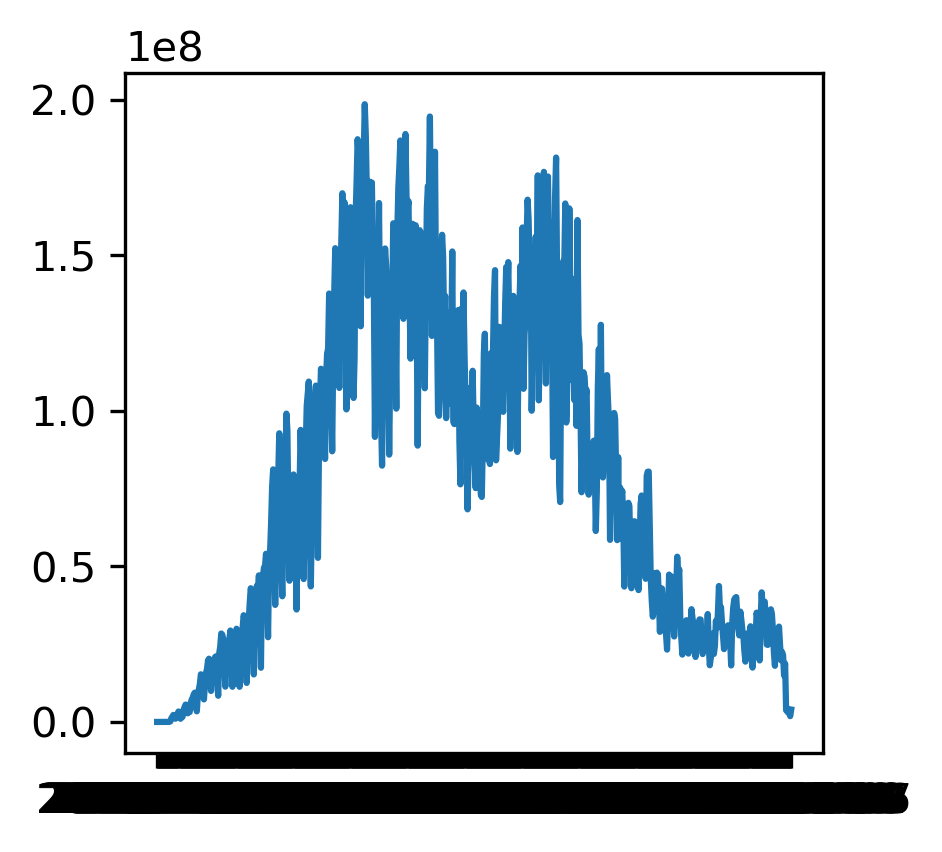

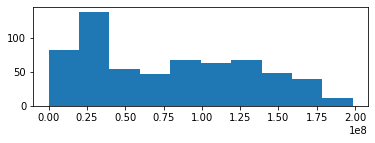

In [20]:
#box cox method for variance stablization
from scipy.stats import boxcox
df_daily_vaccinations['daily_vaccinations'], lam = boxcox(df_daily_vaccinations['daily_vaccinations_raw'])
print('Lambda: %f' % lam)
# line plot
plt.figure(figsize=(3,3),dpi=300)
plt.plot(df_daily_vaccinations['Date'],df_daily_vaccinations['daily_vaccinations_raw'])
plt.show()
# histogram
plt.subplot(212)
plt.hist(df_daily_vaccinations['daily_vaccinations_raw'])
plt.show()


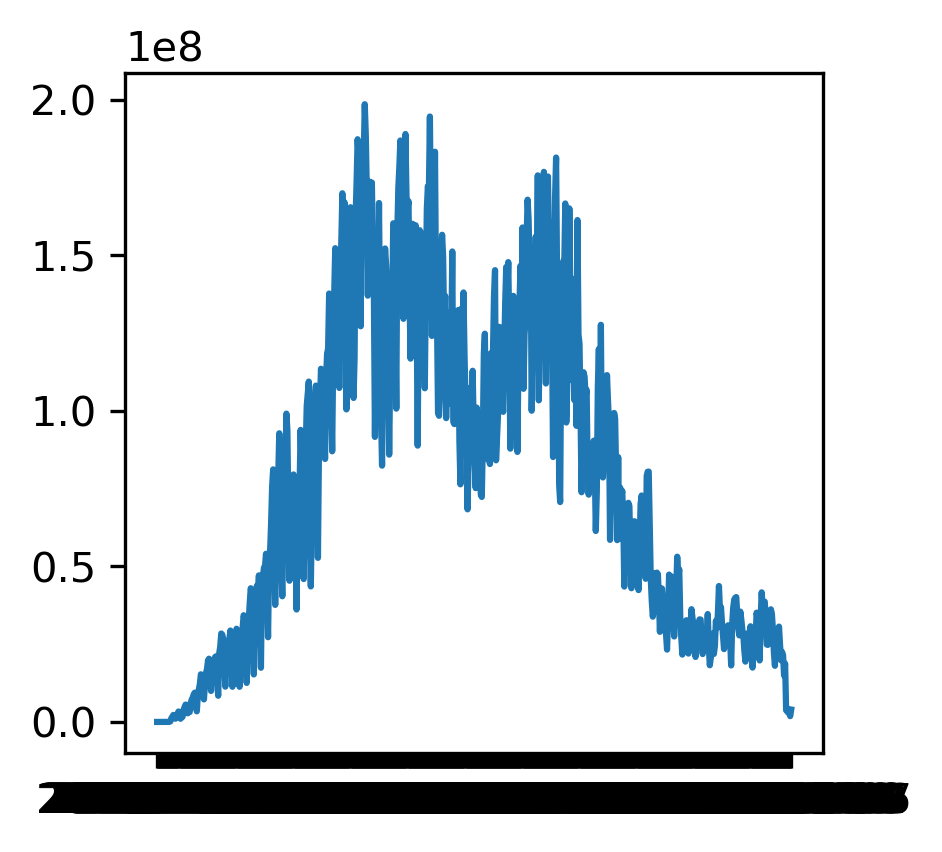

In [23]:
df_daily_vaccinations['daily_vaccinations_raw']


train = df_daily_vaccinations['daily_vaccinations_raw'][:436]
test = df_daily_vaccinations['daily_vaccinations_raw'][436:]


plt.figure(figsize=(3,3),dpi=300)
plt.plot(df_daily_vaccinations['Date'],df_daily_vaccinations['daily_vaccinations_raw'])
plt.show()

In [24]:
#testing the stationarity by DF test which results it as stationary time series
#by looking at the graph and adf test it is clearly  non_stationary.


from statsmodels.tsa.stattools import adfuller
result = adfuller(df_daily_vaccinations['daily_vaccinations_raw'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.126301
p-value: 0.704470
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


In [25]:
# KPSS test
from statsmodels.tsa.stattools import kpss
result = kpss(df_daily_vaccinations['daily_vaccinations_raw'])
print(result)
#shows series is non stationary

(0.7261463967746, 0.01116850938412727, 19, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


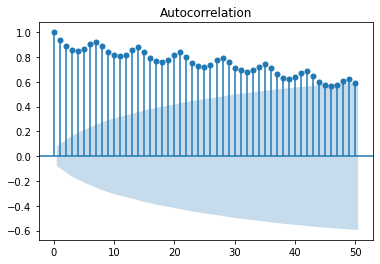

In [27]:
#ACF plot upto lag 50

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_daily_vaccinations['daily_vaccinations_raw'], lags = 50)
plt.show()


In [28]:
df_daily_vaccinations['daily_vaccinations_with_diff_1'] = df_daily_vaccinations['daily_vaccinations'] - df_daily_vaccinations['daily_vaccinations'].shift(1)
df_daily_vaccinations


,daily_vaccinations_raw,Date,daily_vaccinations,daily_vaccinations_with_diff_1
0,4.985070e-01,2020-12-02,-0.598347,NaN
1,3.291876e+00,2020-12-03,1.572878,2.171225
2,3.805223e+00,2020-12-04,1.827714,0.254836
3,3.856850e+00,2020-12-05,1.852260,0.024547
4,3.987625e+00,2020-12-06,1.913636,0.061376
...,...,...,...,...
619,3.372843e+06,2022-08-13,1837.217155,-97.353161
620,3.026221e+06,2022-08-14,1750.282234,-86.934921
621,3.168830e+06,2022-08-15,1786.684205,36.401971
622,1.863185e+06,2022-08-16,1409.061627,-377.622578


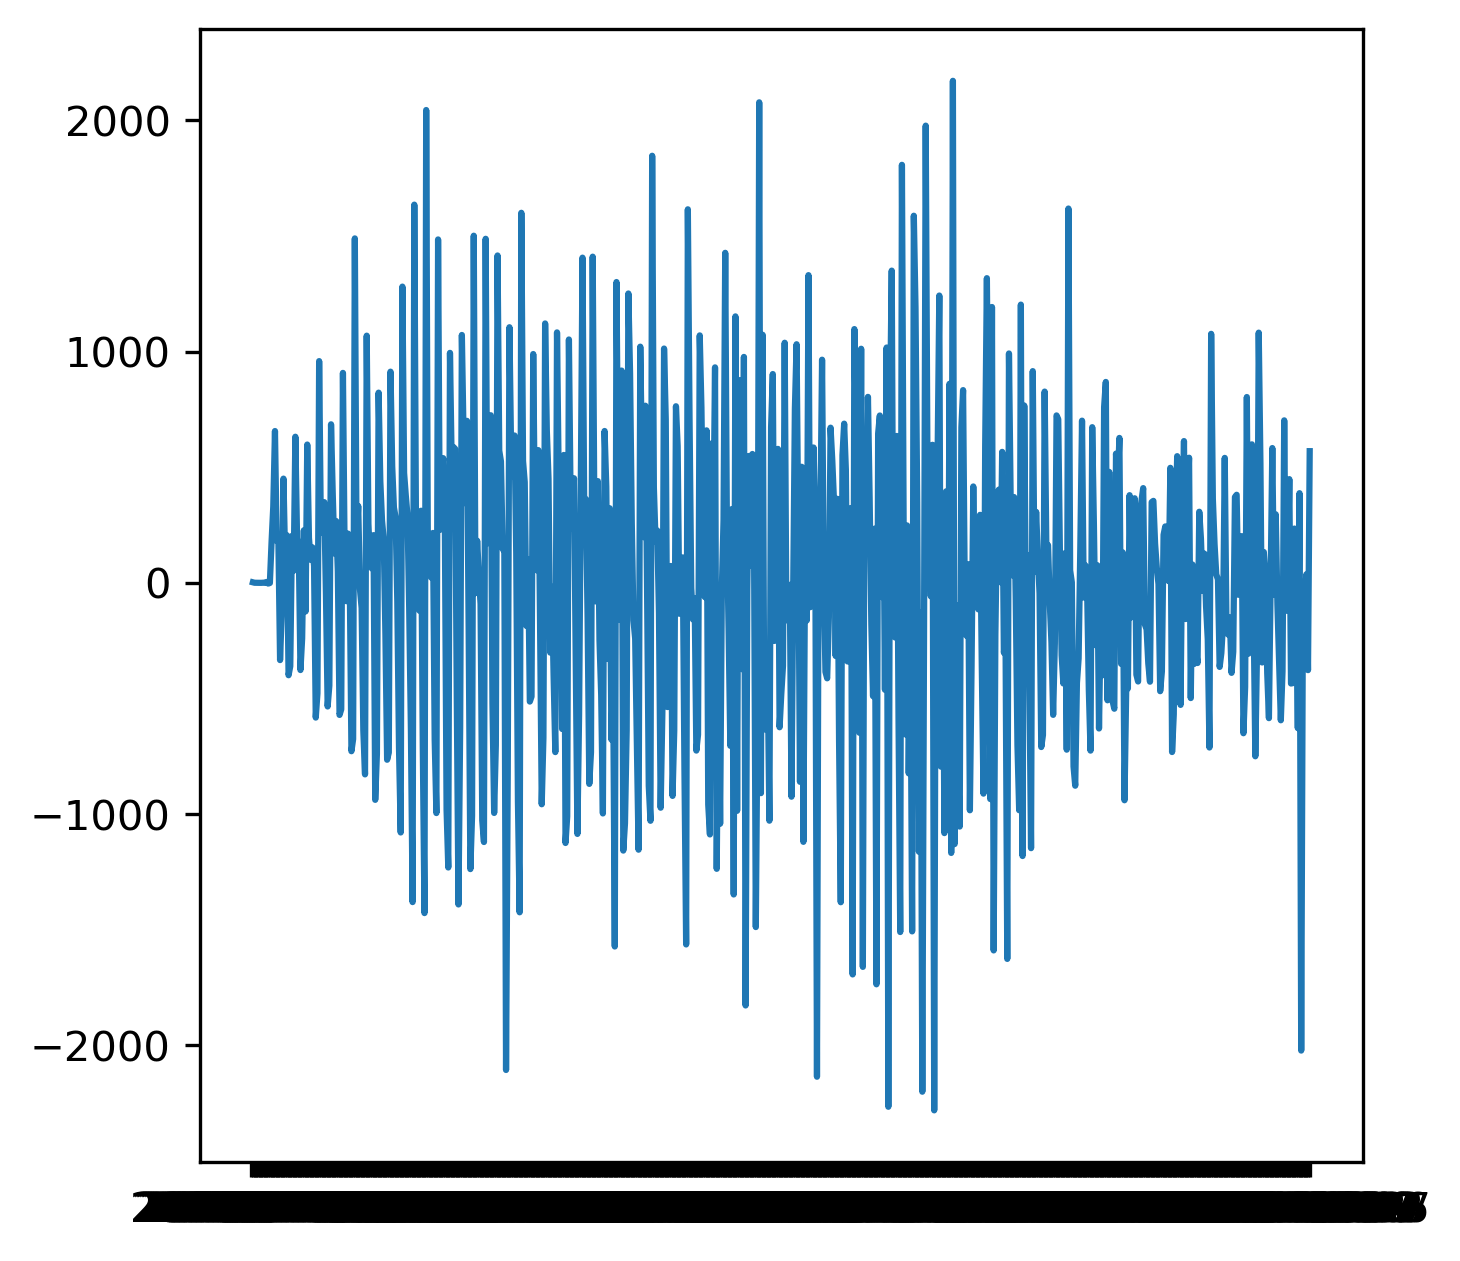

In [29]:
plt.figure(figsize=(5,5),dpi=300)
plt.plot(df_daily_vaccinations['Date'],df_daily_vaccinations['daily_vaccinations_with_diff_1'])
plt.show()


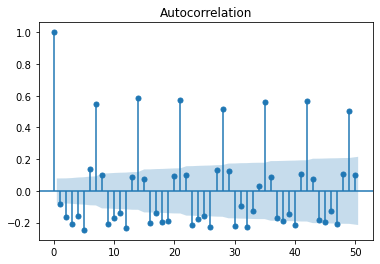

In [30]:
#acf plot of dataframe of diff 1
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_daily_vaccinations['daily_vaccinations_with_diff_1'][1:], lags = 50)
plt.show()

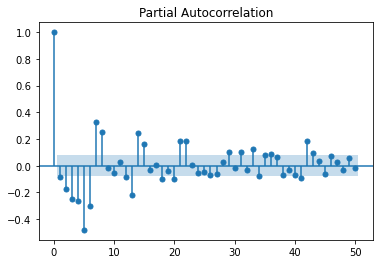

In [31]:
#pacf plot of dataframe of diff 1
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_daily_vaccinations['daily_vaccinations_with_diff_1'][1:], lags = 50)
plt.show()

In [32]:
#DF test on data with diff 1
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_daily_vaccinations['daily_vaccinations_with_diff_1'][1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
#shows non stationary

ADF Statistic: -5.601105
p-value: 0.000001
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


In [33]:
# KPSS test
from statsmodels.tsa.stattools import kpss
result = kpss(df_daily_vaccinations['daily_vaccinations_with_diff_1'][1:])
print(result)
#shows series is non stationary


(0.8886305881201364, 0.01, 19, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [34]:
#second order differencing of raw data
df_daily_vaccinations['daily_vaccinations_with_diff_2'] = df_daily_vaccinations['daily_vaccinations_with_diff_1'] - df_daily_vaccinations['daily_vaccinations_with_diff_1'].shift(1)
df_daily_vaccinations

,daily_vaccinations_raw,Date,daily_vaccinations,daily_vaccinations_with_diff_1,daily_vaccinations_with_diff_2
0,4.985070e-01,2020-12-02,-0.598347,NaN,NaN
1,3.291876e+00,2020-12-03,1.572878,2.171225,NaN
2,3.805223e+00,2020-12-04,1.827714,0.254836,-1.916389
3,3.856850e+00,2020-12-05,1.852260,0.024547,-0.230289
4,3.987625e+00,2020-12-06,1.913636,0.061376,0.036829
...,...,...,...,...,...
619,3.372843e+06,2022-08-13,1837.217155,-97.353161,1925.122731
620,3.026221e+06,2022-08-14,1750.282234,-86.934921,10.418241
621,3.168830e+06,2022-08-15,1786.684205,36.401971,123.336892
622,1.863185e+06,2022-08-16,1409.061627,-377.622578,-414.024549


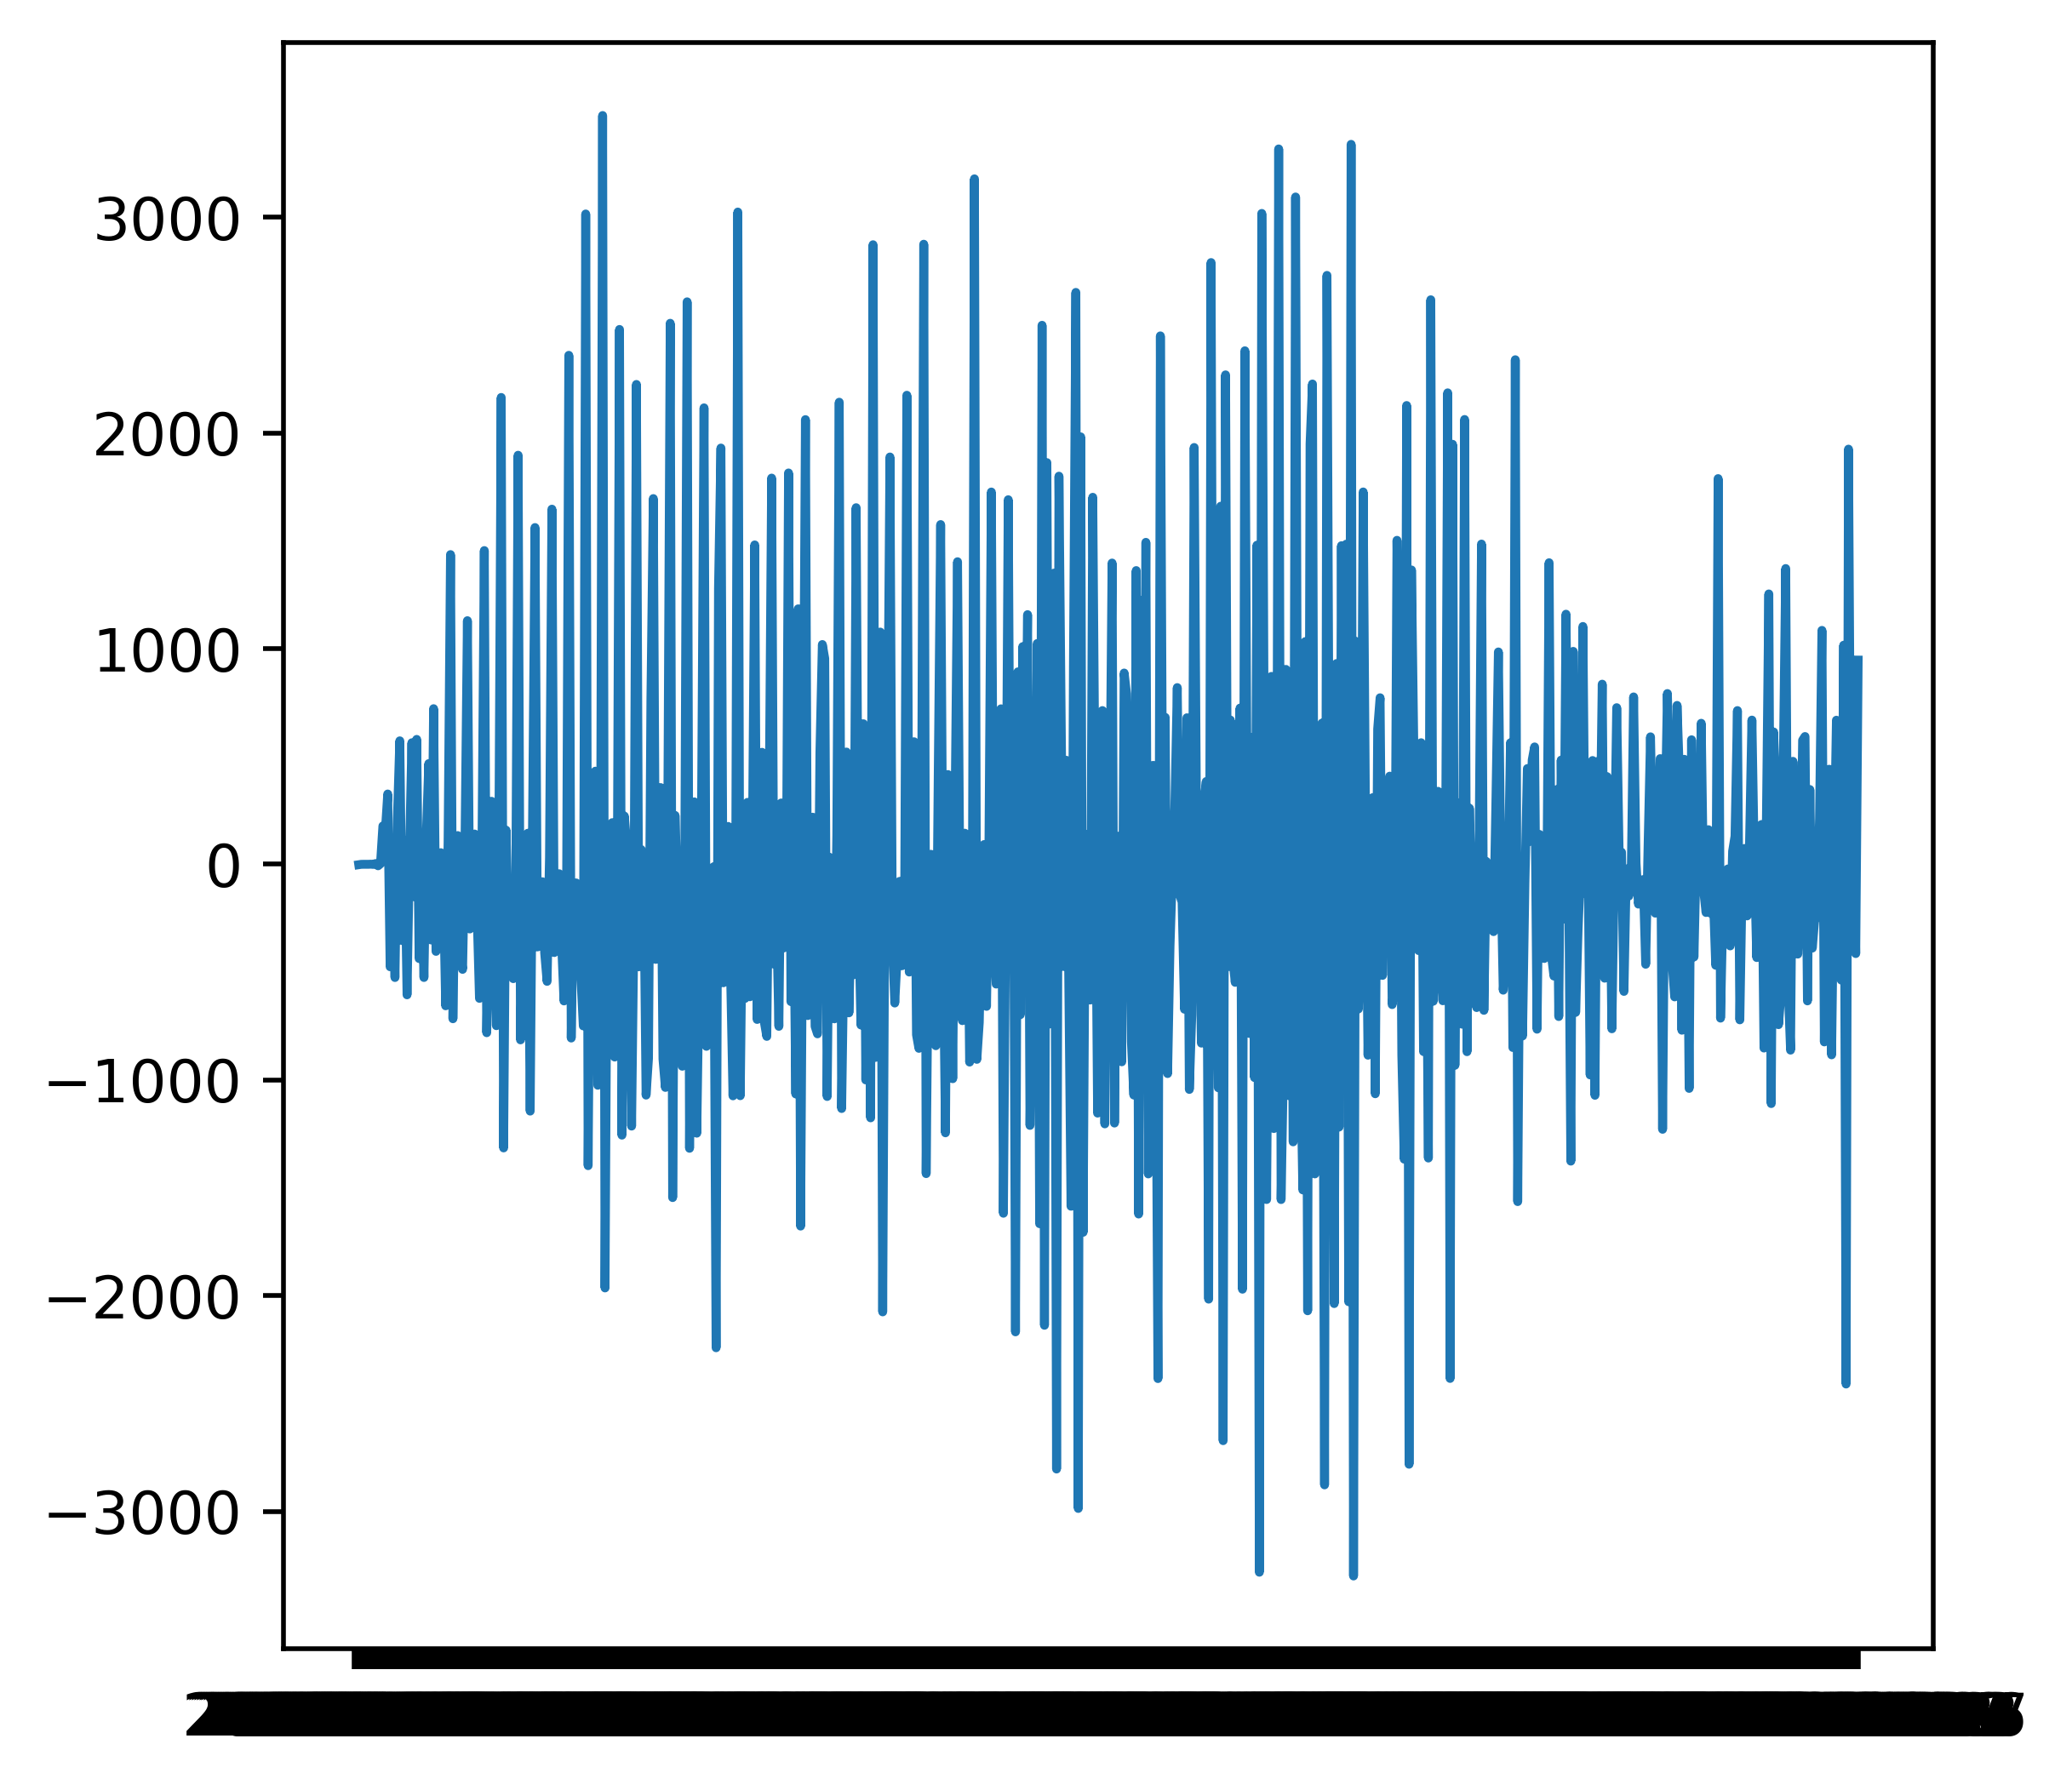

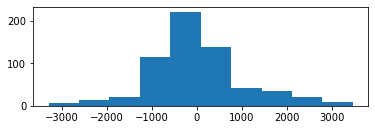

In [35]:
#ploting the time series after second  order differning
plt.figure(figsize=(5,5),dpi=500)
plt.plot(df_daily_vaccinations['Date'],df_daily_vaccinations['daily_vaccinations_with_diff_2'])
plt.show()
# histogram
plt.subplot(212)
plt.hist(df_daily_vaccinations['daily_vaccinations_with_diff_2'])
plt.show()

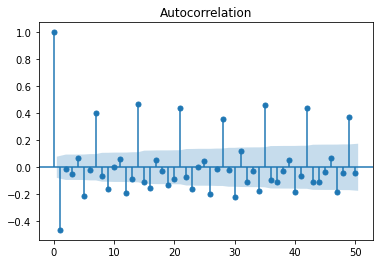

In [36]:
#acf plot of dataframe of diff 2
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_daily_vaccinations['daily_vaccinations_with_diff_2'][2:], lags = 50)
plt.show()

C:\Users\anura\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


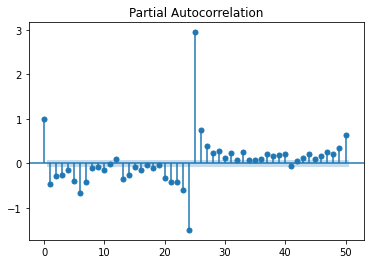

In [37]:
#pacf plot of dataframe of diff 2
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_daily_vaccinations['daily_vaccinations_with_diff_2'][2:], lags = 50)
plt.show()



In [38]:

#df test for data with diff 2
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_daily_vaccinations['daily_vaccinations_with_diff_2'][2:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
#shows series is stationary

ADF Statistic: -10.143153
p-value: 0.000000
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


In [39]:
# KPSS test
from statsmodels.tsa.stattools import kpss
result = kpss(df_daily_vaccinations['daily_vaccinations_with_diff_2'][2:])
print(result)
#shows series is stationary


(0.021611500222610172, 0.1, 19, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [40]:
df_date_tot


,daily_vaccinations_raw,Date
0,4.985070e-01,2020-12-02
1,3.291876e+00,2020-12-03
2,3.805223e+00,2020-12-04
3,3.856850e+00,2020-12-05
4,3.987625e+00,2020-12-06
...,...,...
619,3.372843e+06,2022-08-13
620,3.026221e+06,2022-08-14
621,3.168830e+06,2022-08-15
622,1.863185e+06,2022-08-16


In [41]:
#fitting arima models
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults
import re
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import pylab 
import scipy.stats as stats
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy.stats import normaltest

In [50]:
#fitting arima models
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults
import re
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import pylab 
import scipy.stats as stats
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy.stats import normaltest
#ARIMA Model
def arima(p,d,q):
    model = ARIMA(train, order=(p,d,q))
    model_fit = model.fit(disp=0)
    print(model_fit.summary())
    print(ARMAResults.cov_params(model_fit))
    diag_elt = np.sqrt(ARMAResults.cov_params(model_fit).diagonal())
    D = np.diag(diag_elt)
    corr_mat = np.linalg.inv(D).dot(ARMAResults.cov_params(model_fit)).dot(np.linalg.inv(D))
    print(corr_mat)
    
    
    # Plot residual errors
    residuals = pd.DataFrame(model_fit.resid)
    fig, ax = plt.subplots(1,2)
    residuals.plot(title="Residuals", ax=ax[0])
    residuals.plot(kind='kde', title='Density', ax=ax[1])
    plt.show()

    
    # q-q plot of residuals
    plt.subplot(1,1,1)
    qqplot(model_fit.resid, line='r', ax=plt.gca())
    plt.show()
    
    #anderson darling test of normality of residual distribution
    result = anderson(model_fit.resid)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            
    # Shapiro-Wilk Test of normality of residual distribution
    stat, p = shapiro(model_fit.resid)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    
    # Mann-Whitney U test
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    data1 = randn(67)
    stat, p = mannwhitneyu(data1, model_fit.resid)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')
    
    
    #stats.probplot(model_fit.resid, dist="norm", plot=plt)
    
    
    # acf plot of residuals
    plot_acf(residuals, lags = 50)
    plt.show()
    # Forecast
    fc, se, conf = model_fit.forecast(188, alpha=0.05)  # 95% conf
    
    
    #ljung box test
    print(sm.stats.acorr_ljungbox(residuals, lags=[1,2,3,4,5,10,12,14,15,17], return_df=True)) #if statistics p value is less than critical value than reject H0
    #means residuals are correlated

    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    

C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                                ARIMA Model Results                                 
Dep. Variable:     D.daily_vaccinations_raw   No. Observations:                  435
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -7901.715
Method:                             css-mle   S.D. of innovations       18720491.111
Date:                      Fri, 19 Aug 2022   AIC                          15811.430
Time:                              13:11:30   BIC                          15827.731
Sample:                                   1   HQIC                         15817.864
                                                                                    
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           2.159e+05   2.01e+05      1.072      0.284   -1.79e+05    6.11e+05
ar.L1.D.daily_vaccinati

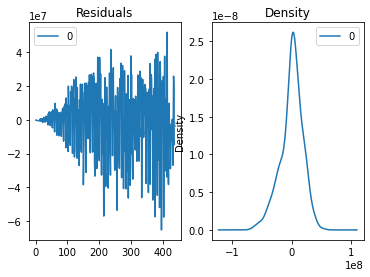

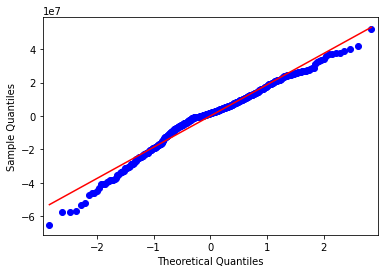

Statistic: 3.655
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistics=0.976, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12663.000, p=0.042
Different distribution (reject H0)


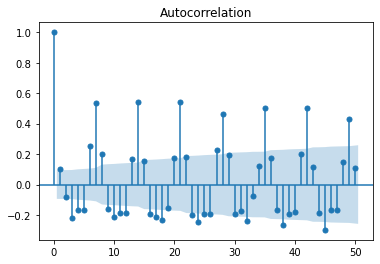

       lb_stat     lb_pvalue
1     4.360414  3.678336e-02
2     7.508597  2.341687e-02
3    29.032987  2.203970e-06
4    41.608894  2.010428e-08
5    54.402029  1.732658e-10
10  258.136679  1.054297e-49
12  289.246928  8.472483e-55
14  434.155744  7.920521e-84
15  444.549388  2.902744e-85
17  482.123404  1.098166e-91


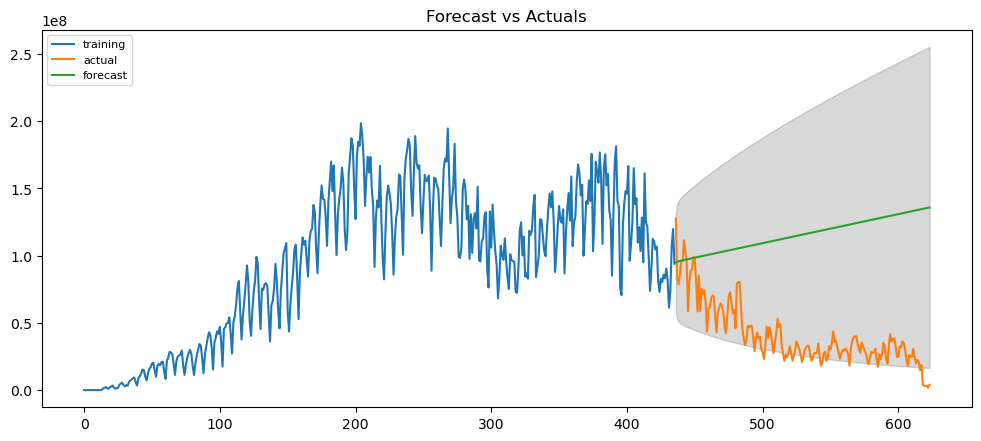

In [51]:



arima(1,1,1) #bad



C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                                ARIMA Model Results                                 
Dep. Variable:     D.daily_vaccinations_raw   No. Observations:                  435
Model:                       ARIMA(2, 1, 1)   Log Likelihood               -7889.264
Method:                             css-mle   S.D. of innovations       18187816.825
Date:                      Fri, 19 Aug 2022   AIC                          15788.528
Time:                              13:12:05   BIC                          15808.904
Sample:                                   1   HQIC                         15796.570
                                                                                    
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           2.159e+05   2.02e+05      1.067      0.286   -1.81e+05    6.12e+05
ar.L1.D.daily_vaccinati

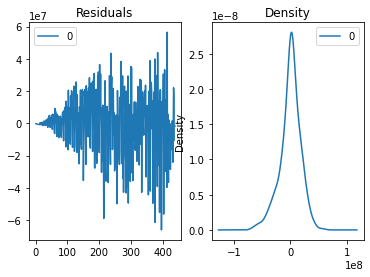

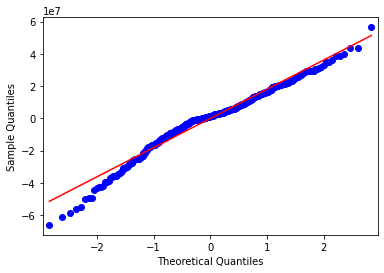

Statistic: 4.087
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistics=0.972, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12998.000, p=0.077
Same distribution (fail to reject H0)


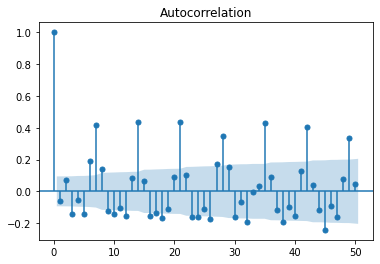

       lb_stat     lb_pvalue
1     1.496357  2.212327e-01
2     3.570027  1.677948e-01
3    12.746848  5.217307e-03
4    14.180731  6.740025e-03
5    23.363411  2.876192e-04
10  140.329953  3.606748e-25
12  156.182525  3.144623e-27
14  245.221519  2.794245e-44
15  247.210885  4.658095e-44
17  266.421530  9.101540e-47


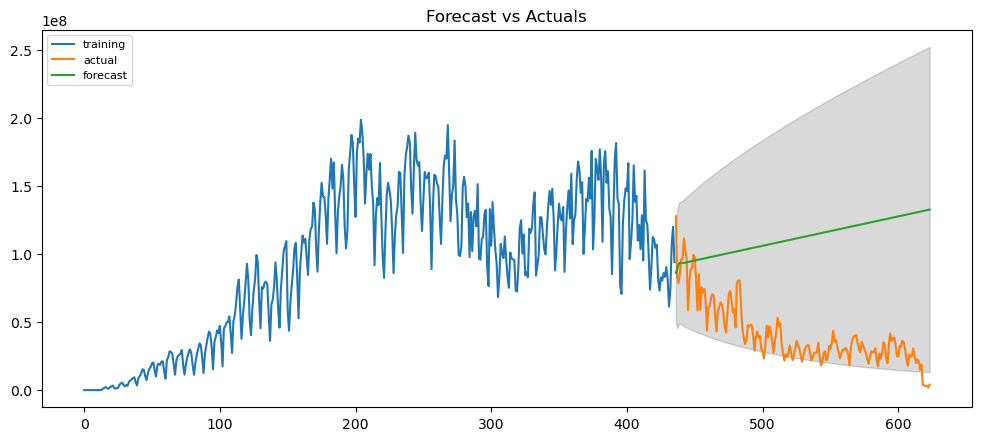

In [52]:
arima(2,1,1) #bad

C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                                ARIMA Model Results                                 
Dep. Variable:     D.daily_vaccinations_raw   No. Observations:                  435
Model:                       ARIMA(1, 1, 2)   Log Likelihood               -7895.709
Method:                             css-mle   S.D. of innovations       18462396.065
Date:                      Fri, 19 Aug 2022   AIC                          15801.418
Time:                              13:12:26   BIC                          15821.794
Sample:                                   1   HQIC                         15809.460
                                                                                    
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           2.159e+05   2.01e+05      1.075      0.282   -1.78e+05    6.09e+05
ar.L1.D.daily_vaccinati

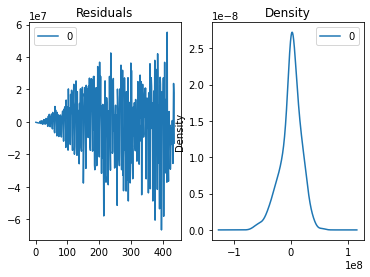

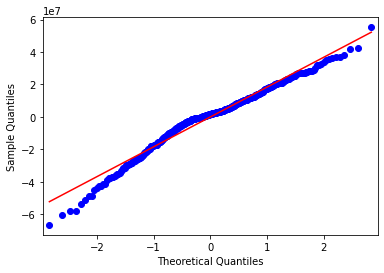

Statistic: 4.019
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistics=0.973, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12797.000, p=0.054
Same distribution (fail to reject H0)


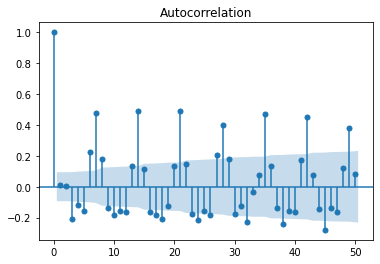

       lb_stat     lb_pvalue
1     0.083372  7.727782e-01
2     0.092768  9.546755e-01
3    19.235213  2.444271e-04
4    25.295708  4.387035e-05
5    35.831226  1.026574e-06
10  196.267624  9.682147e-37
12  218.957567  3.904306e-40
14  335.366203  4.802683e-63
15  341.511013  1.249914e-63
17  369.382375  4.557117e-68


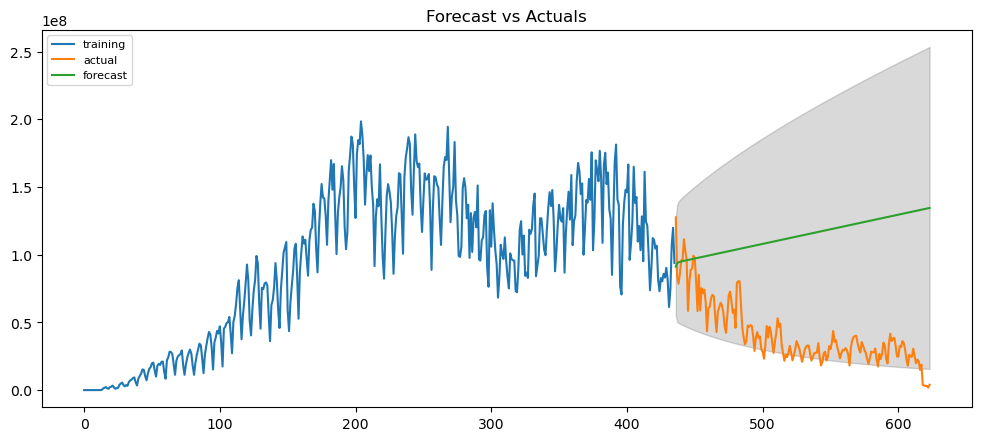

In [53]:
arima(1,1,2) #bad

C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                                ARIMA Model Results                                 
Dep. Variable:     D.daily_vaccinations_raw   No. Observations:                  435
Model:                       ARIMA(2, 1, 2)   Log Likelihood               -7855.025
Method:                             css-mle   S.D. of innovations       16794516.098
Date:                      Fri, 19 Aug 2022   AIC                          15722.050
Time:                              13:12:40   BIC                          15746.502
Sample:                                   1   HQIC                         15731.701
                                                                                    
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           2.159e+05   3.21e+05      0.673      0.501   -4.12e+05    8.44e+05
ar.L1.D.daily_vaccinati

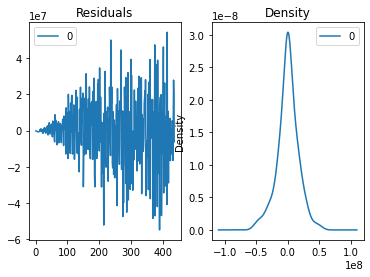

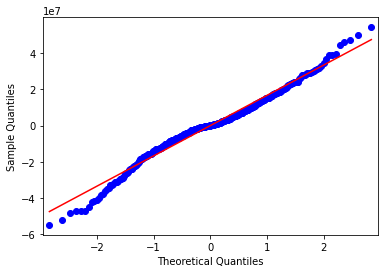

Statistic: 3.279
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistics=0.980, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=14472.000, p=0.464
Same distribution (fail to reject H0)


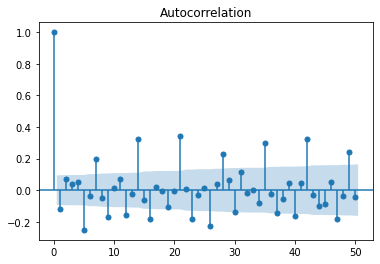

       lb_stat     lb_pvalue
1     6.159134  1.307352e-02
2     8.460046  1.455205e-02
3     9.040056  2.876303e-02
4    10.194697  3.727269e-02
5    38.233653  3.386623e-07
10   70.226727  4.008571e-11
12   83.914499  7.356328e-13
14  131.585117  3.305292e-21
15  133.284540  4.827118e-21
17  148.274380  5.324932e-23


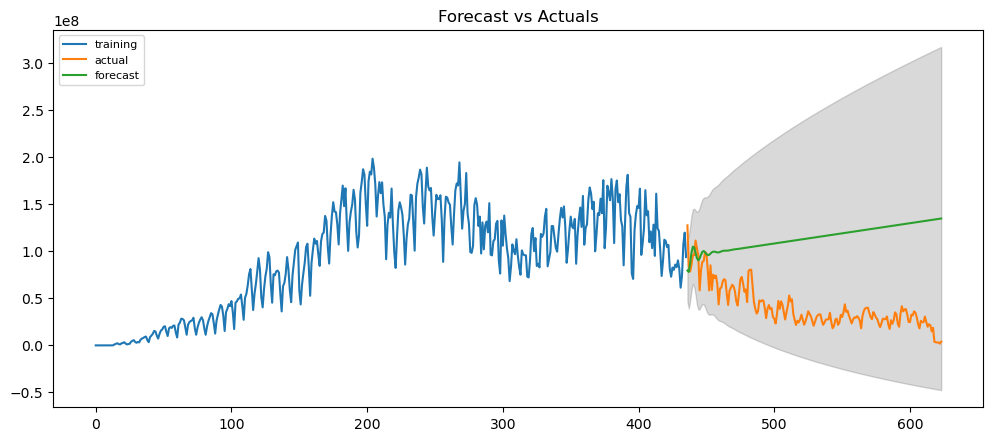

In [54]:
arima(2,1,2) #second best

C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.e

                                 ARIMA Model Results                                 
Dep. Variable:     D2.daily_vaccinations_raw   No. Observations:                  434
Model:                        ARIMA(2, 2, 4)   Log Likelihood               -7801.946
Method:                              css-mle   S.D. of innovations                nan
Date:                       Fri, 19 Aug 2022   AIC                          15619.891
Time:                               13:12:51   BIC                          15652.476
Sample:                                    2   HQIC                         15632.753
                                                                                     
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -5.981e+04    148.121   -403.790      0.000   -6.01e+04   -5.95e+04
ar.L1.D2.dai

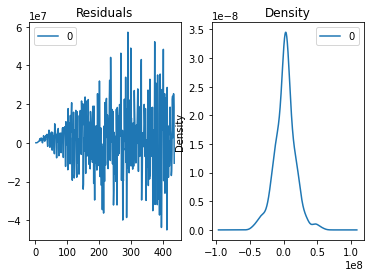

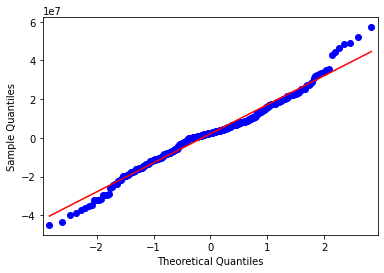

Statistic: 3.155
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistics=0.979, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=10519.000, p=0.000
Different distribution (reject H0)


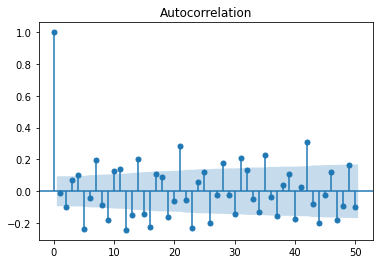

       lb_stat     lb_pvalue
1     0.042950  8.358202e-01
2     4.357883  1.131613e-01
3     6.538060  8.817352e-02
4    11.237910  2.401642e-02
5    35.616196  1.133379e-06
10   78.937595  8.106454e-13
12  114.586603  7.380215e-19
14  143.125753  1.693850e-23
15  152.611548  7.301601e-25
17  181.088177  1.752063e-29


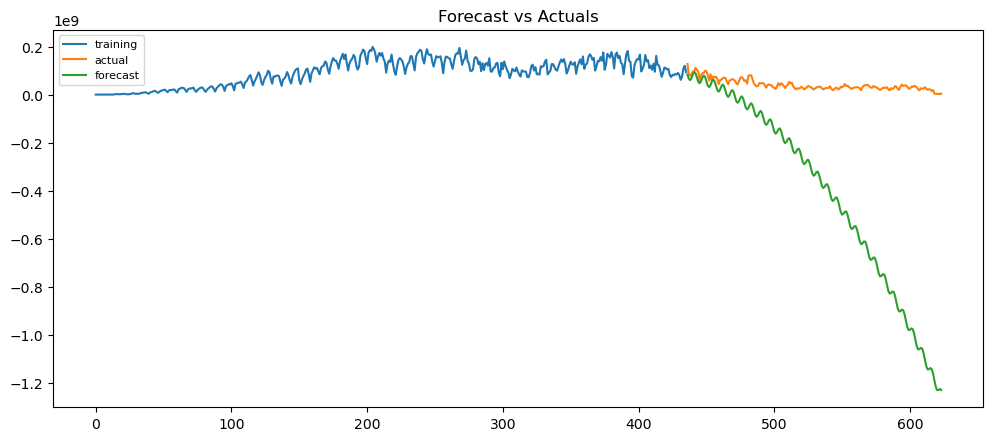

In [55]:
arima(2,2,4)

C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retval

                                ARIMA Model Results                                 
Dep. Variable:     D.daily_vaccinations_raw   No. Observations:                  435
Model:                       ARIMA(3, 1, 3)   Log Likelihood               -7805.731
Method:                             css-mle   S.D. of innovations       14730902.564
Date:                      Fri, 19 Aug 2022   AIC                          15627.462
Time:                              13:13:06   BIC                          15660.065
Sample:                                   1   HQIC                         15640.330
                                                                                    
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           2.159e+05        nan        nan        nan         nan         nan
ar.L1.D.daily_vaccinati

<ipython-input-50-a3b0987e0183>:18: RuntimeWarning: invalid value encountered in sqrt
  diag_elt = np.sqrt(ARMAResults.cov_params(model_fit).diagonal())


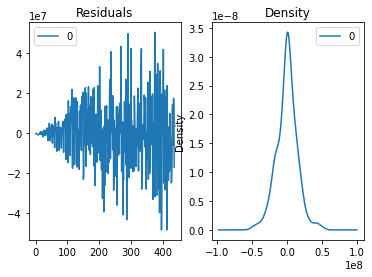

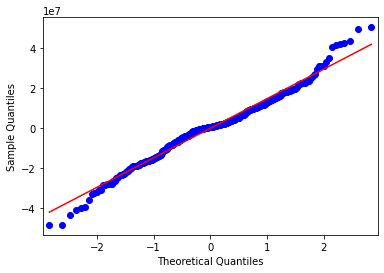

Statistic: 2.720
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistics=0.982, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=13534.000, p=0.174
Same distribution (fail to reject H0)


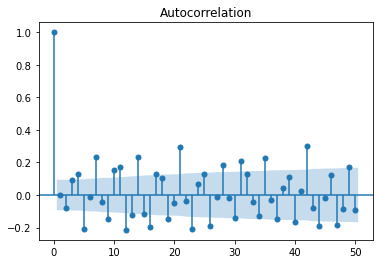

       lb_stat     lb_pvalue
1     0.000137  9.906722e-01
2     2.764841  2.509703e-01
3     6.700959  8.206531e-02
4    14.011576  7.258201e-03
5    32.788770  4.144909e-06
10   78.047644  1.210351e-12
12  111.620502  2.859308e-18
14  142.264491  2.514207e-23
15  148.196345  5.501266e-24
17  173.540566  5.565314e-28


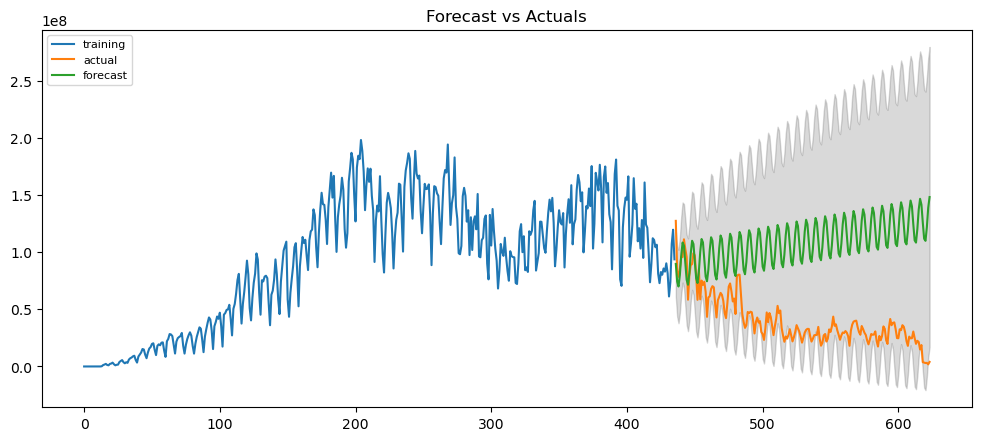

In [56]:
arima(3,1,3) #third best


C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                                ARIMA Model Results                                 
Dep. Variable:     D.daily_vaccinations_raw   No. Observations:                  435
Model:                       ARIMA(1, 1, 2)   Log Likelihood               -7895.709
Method:                             css-mle   S.D. of innovations       18462396.065
Date:                      Fri, 19 Aug 2022   AIC                          15801.418
Time:                              13:17:51   BIC                          15821.794
Sample:                                   1   HQIC                         15809.460
                                                                                    
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           2.159e+05   2.01e+05      1.075      0.282   -1.78e+05    6.09e+05
ar.L1.D.daily_vaccinati

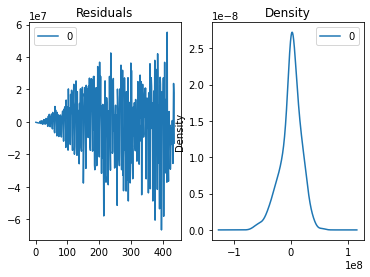

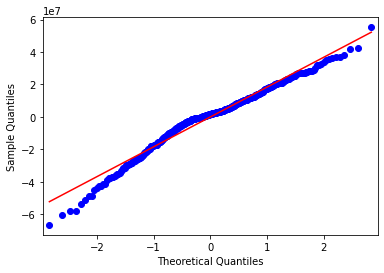

Statistic: 4.019
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistics=0.973, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12797.000, p=0.054
Same distribution (fail to reject H0)


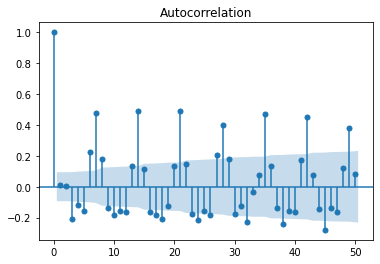

       lb_stat     lb_pvalue
1     0.083372  7.727782e-01
2     0.092768  9.546755e-01
3    19.235213  2.444271e-04
4    25.295708  4.387035e-05
5    35.831226  1.026574e-06
10  196.267624  9.682147e-37
12  218.957567  3.904306e-40
14  335.366203  4.802683e-63
15  341.511013  1.249914e-63
17  369.382375  4.557117e-68


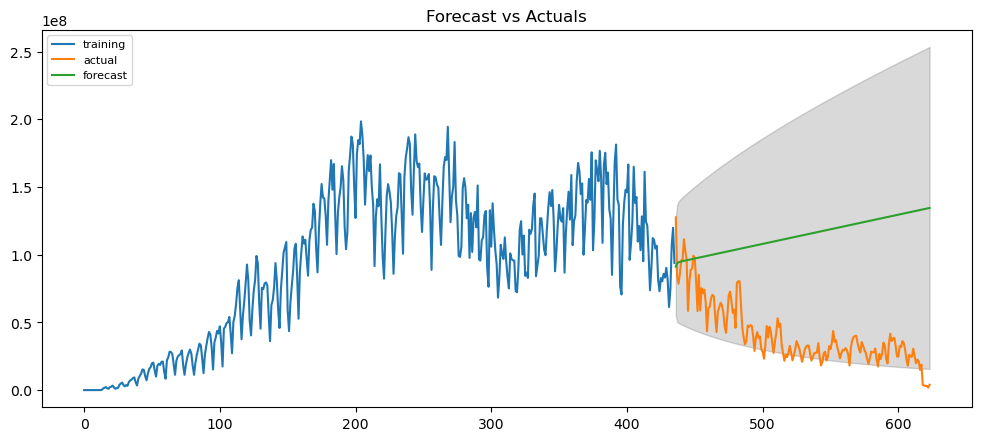

In [61]:
arima(1,1,2) #less AIC than 2,1,2 but not all variables are signifi

C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                                ARIMA Model Results                                 
Dep. Variable:     D.daily_vaccinations_raw   No. Observations:                  435
Model:                       ARIMA(2, 1, 1)   Log Likelihood               -7889.264
Method:                             css-mle   S.D. of innovations       18187816.825
Date:                      Fri, 19 Aug 2022   AIC                          15788.528
Time:                              13:18:09   BIC                          15808.904
Sample:                                   1   HQIC                         15796.570
                                                                                    
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           2.159e+05   2.02e+05      1.067      0.286   -1.81e+05    6.12e+05
ar.L1.D.daily_vaccinati

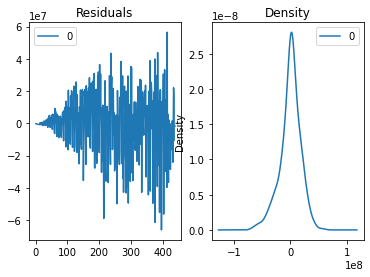

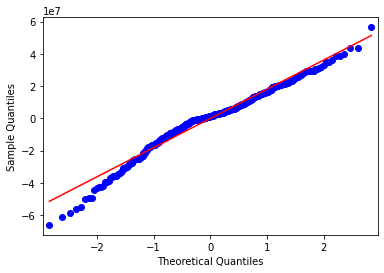

Statistic: 4.087
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistics=0.972, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12998.000, p=0.077
Same distribution (fail to reject H0)


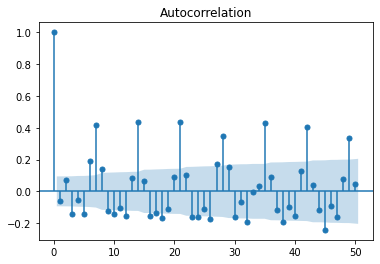

       lb_stat     lb_pvalue
1     1.496357  2.212327e-01
2     3.570027  1.677948e-01
3    12.746848  5.217307e-03
4    14.180731  6.740025e-03
5    23.363411  2.876192e-04
10  140.329953  3.606748e-25
12  156.182525  3.144623e-27
14  245.221519  2.794245e-44
15  247.210885  4.658095e-44
17  266.421530  9.101540e-47


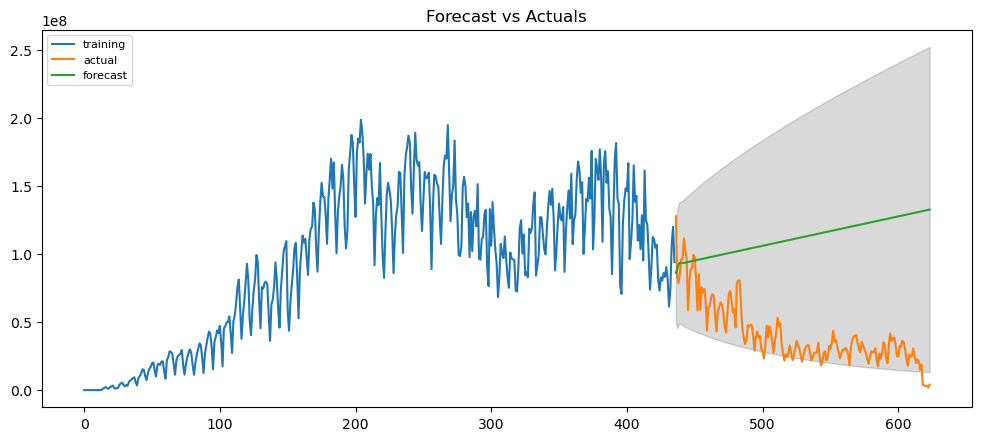

In [62]:
arima(2,1,1) #bad

C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                                ARIMA Model Results                                 
Dep. Variable:     D.daily_vaccinations_raw   No. Observations:                  435
Model:                       ARIMA(1, 1, 2)   Log Likelihood               -7895.709
Method:                             css-mle   S.D. of innovations       18462396.065
Date:                      Fri, 19 Aug 2022   AIC                          15801.418
Time:                              13:18:22   BIC                          15821.794
Sample:                                   1   HQIC                         15809.460
                                                                                    
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           2.159e+05   2.01e+05      1.075      0.282   -1.78e+05    6.09e+05
ar.L1.D.daily_vaccinati

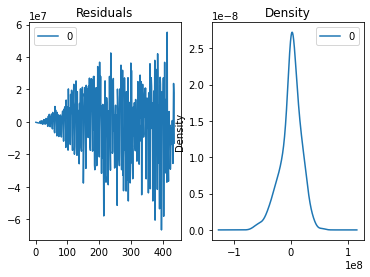

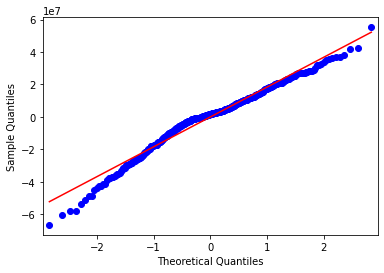

Statistic: 4.019
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistics=0.973, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12797.000, p=0.054
Same distribution (fail to reject H0)


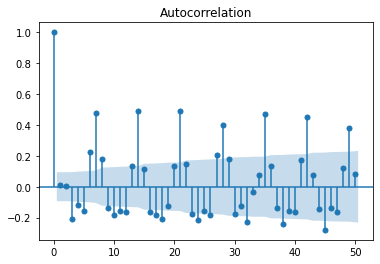

       lb_stat     lb_pvalue
1     0.083372  7.727782e-01
2     0.092768  9.546755e-01
3    19.235213  2.444271e-04
4    25.295708  4.387035e-05
5    35.831226  1.026574e-06
10  196.267624  9.682147e-37
12  218.957567  3.904306e-40
14  335.366203  4.802683e-63
15  341.511013  1.249914e-63
17  369.382375  4.557117e-68


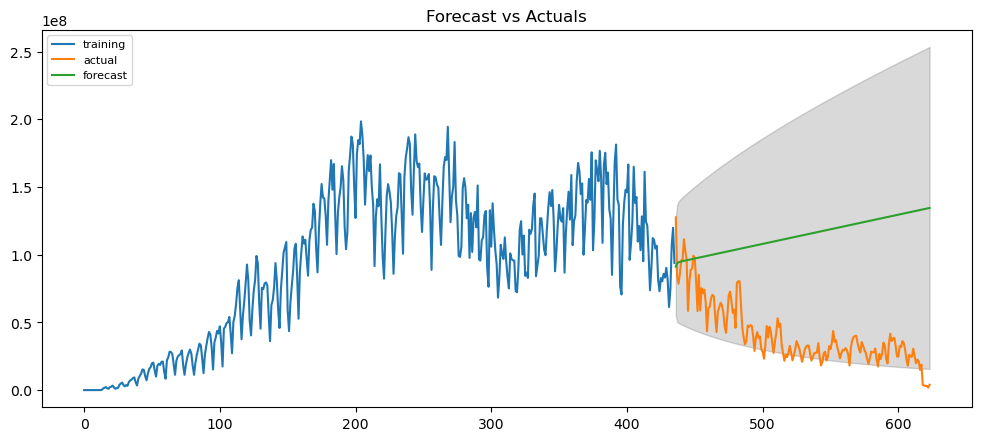

In [63]:
arima(1,1,2) #bad

C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

                                ARIMA Model Results                                 
Dep. Variable:     D.daily_vaccinations_raw   No. Observations:                  435
Model:                       ARIMA(2, 1, 3)   Log Likelihood               -7807.105
Method:                             css-mle   S.D. of innovations       14730933.571
Date:                      Fri, 19 Aug 2022   AIC                          15628.210
Time:                              13:18:37   BIC                          15656.738
Sample:                                   1   HQIC                         15639.470
                                                                                    
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           2.159e+05    527.365    409.425      0.000    2.15e+05    2.17e+05
ar.L1.D.daily_vaccinati

<ipython-input-50-a3b0987e0183>:18: RuntimeWarning: invalid value encountered in sqrt
  diag_elt = np.sqrt(ARMAResults.cov_params(model_fit).diagonal())


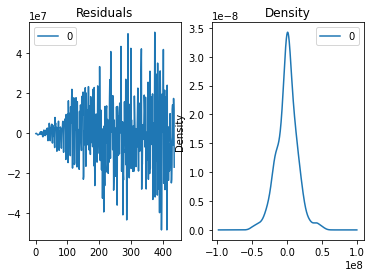

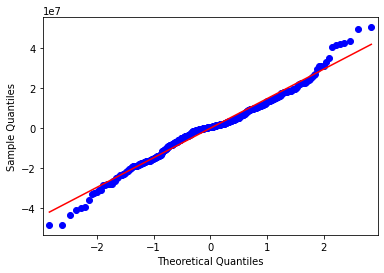

Statistic: 2.721
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistics=0.982, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=13467.000, p=0.159
Same distribution (fail to reject H0)


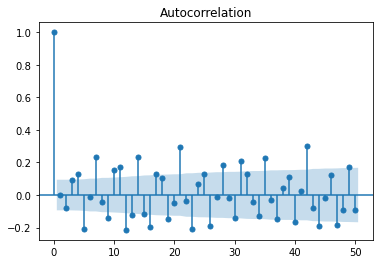

       lb_stat     lb_pvalue
1     0.002887  9.571516e-01
2     2.636227  2.676397e-01
3     6.615765  8.520713e-02
4    13.980229  7.358425e-03
5    32.750742  4.217561e-06
10   77.887990  1.300525e-12
12  111.395724  3.167936e-18
14  142.111166  2.697287e-23
15  148.024853  5.949494e-24
17  173.262825  6.318986e-28


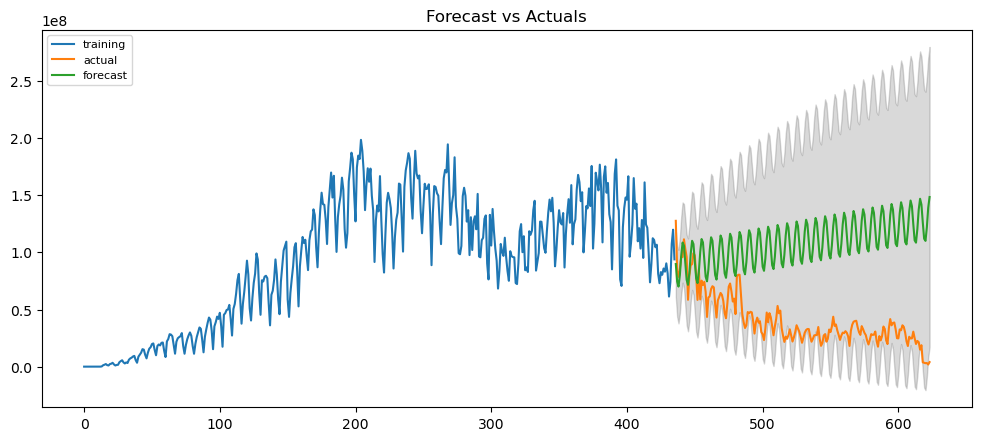

In [64]:

arima(2,1,3) #best


C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                                ARIMA Model Results                                 
Dep. Variable:     D.daily_vaccinations_raw   No. Observations:                  435
Model:                       ARIMA(0, 1, 0)   Log Likelihood               -7944.905
Method:                                 css   S.D. of innovations       20691054.440
Date:                      Fri, 19 Aug 2022   AIC                          15893.811
Time:                              13:18:53   BIC                          15901.962
Sample:                                   1   HQIC                         15897.028
                                                                                    
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.159e+05   9.92e+05      0.218      0.828   -1.73e+06    2.16e+06
[[9.84183296e+11]]
[[1.]]


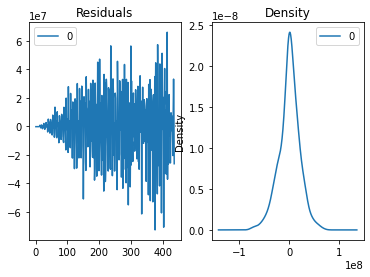

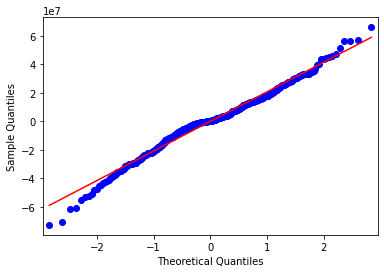

Statistic: 2.711
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistics=0.984, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=13936.000, p=0.283
Same distribution (fail to reject H0)


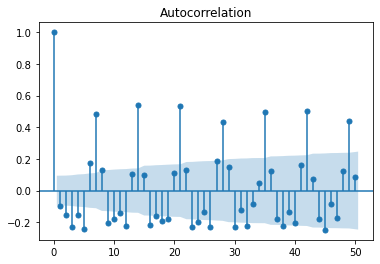

       lb_stat     lb_pvalue
1     4.353169  3.694016e-02
2    15.118305  5.213169e-04
3    38.868647  1.850509e-08
4    49.013834  5.800149e-10
5    74.792492  1.027834e-14
10  234.681556  8.954931e-45
12  266.284808  5.443557e-50
14  402.472458  3.821191e-77
15  406.755591  2.630392e-77
17  439.274779  1.104877e-82


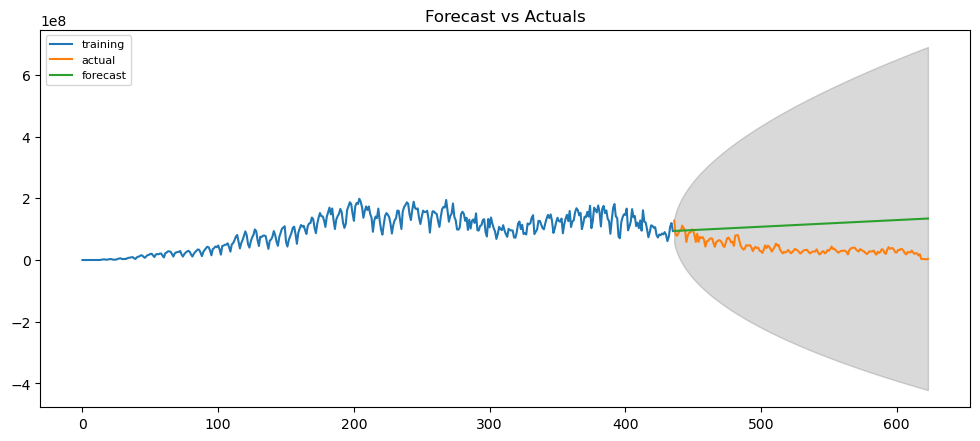

In [65]:
arima(0,1,0)

In [67]:
!pip install pmdarima
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15816.847, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15893.811, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15891.451, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15886.435, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15891.859, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15794.304, Time=0.56 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15880.965, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15768.879, Time=0.43 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=15847.934, Time=0.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=15743.698, Time=0.38 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=15814.231, Time=0.17 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=15623.496, Time=1.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15677.036, Time=2.38 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=15623.762, Time=2.19 sec
 ARIMA(3,1,3)(0,0,0

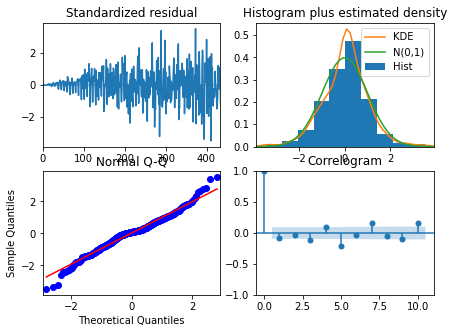

In [68]:
model.plot_diagnostics(figsize=(7,5))
plt.show()


C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

                                 ARIMA Model Results                                 
Dep. Variable:     D2.daily_vaccinations_raw   No. Observations:                  434
Model:                        ARIMA(4, 2, 4)   Log Likelihood               -7791.649
Method:                              css-mle   S.D. of innovations       15018704.412
Date:                       Fri, 19 Aug 2022   AIC                          15603.297
Time:                               13:28:52   BIC                          15644.027
Sample:                                    2   HQIC                         15619.374
                                                                                     
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -5.981e+04        nan        nan        nan         nan         nan
ar.L1.D2.dai

<ipython-input-50-a3b0987e0183>:18: RuntimeWarning: invalid value encountered in sqrt
  diag_elt = np.sqrt(ARMAResults.cov_params(model_fit).diagonal())


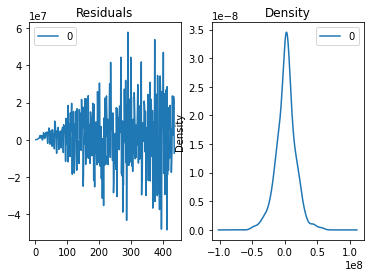

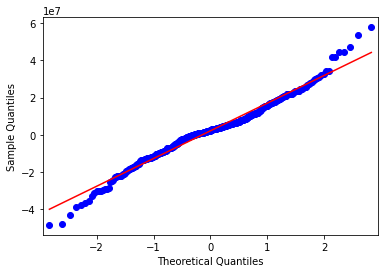

Statistic: 2.962
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistics=0.980, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=10988.000, p=0.001
Different distribution (reject H0)


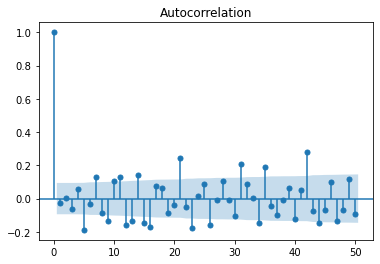

       lb_stat     lb_pvalue
1     0.345808  5.564958e-01
2     0.354656  8.375051e-01
3     1.921370  5.888860e-01
4     3.477071  4.813734e-01
5    19.106428  1.836338e-03
10   43.231471  4.520781e-06
12   62.725218  7.158586e-09
14   79.723016  3.184778e-11
15   89.128996  1.441498e-12
17  105.143386  9.821404e-15


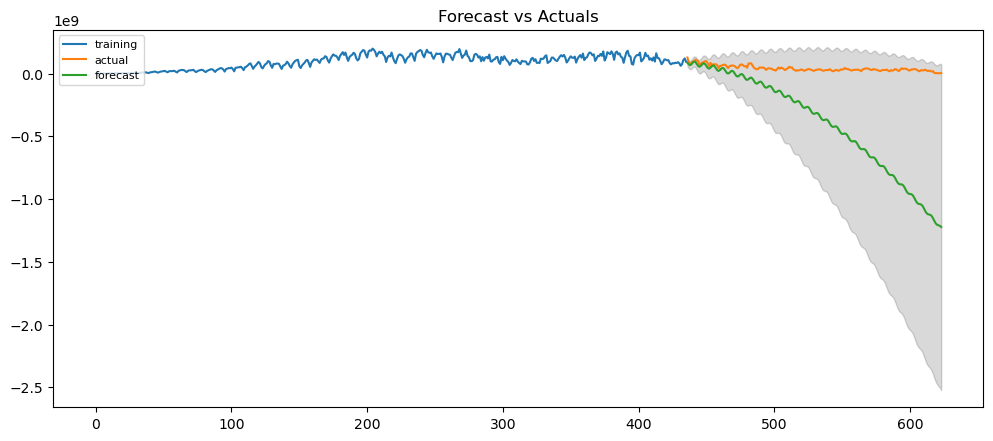

In [69]:
arima(4,2,4)


C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                                ARIMA Model Results                                 
Dep. Variable:     D.daily_vaccinations_raw   No. Observations:                  435
Model:                       ARIMA(1, 1, 2)   Log Likelihood               -7895.709
Method:                             css-mle   S.D. of innovations       18462396.065
Date:                      Fri, 19 Aug 2022   AIC                          15801.418
Time:                              13:29:24   BIC                          15821.794
Sample:                                   1   HQIC                         15809.460
                                                                                    
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           2.159e+05   2.01e+05      1.075      0.282   -1.78e+05    6.09e+05
ar.L1.D.daily_vaccinati

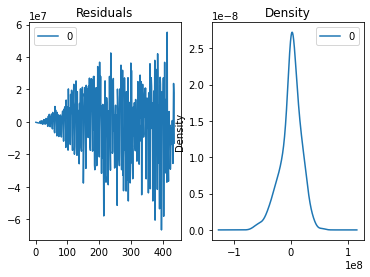

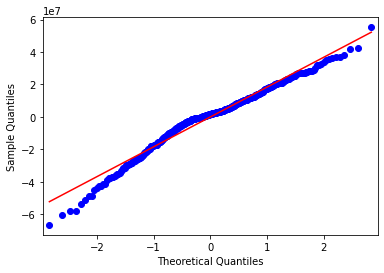

Statistic: 4.019
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)
Statistics=0.973, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12797.000, p=0.054
Same distribution (fail to reject H0)


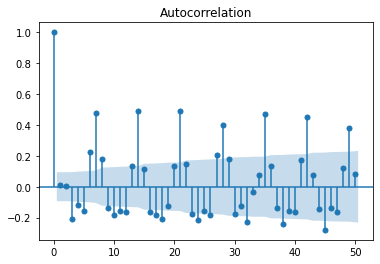

       lb_stat     lb_pvalue
1     0.083372  7.727782e-01
2     0.092768  9.546755e-01
3    19.235213  2.444271e-04
4    25.295708  4.387035e-05
5    35.831226  1.026574e-06
10  196.267624  9.682147e-37
12  218.957567  3.904306e-40
14  335.366203  4.802683e-63
15  341.511013  1.249914e-63
17  369.382375  4.557117e-68


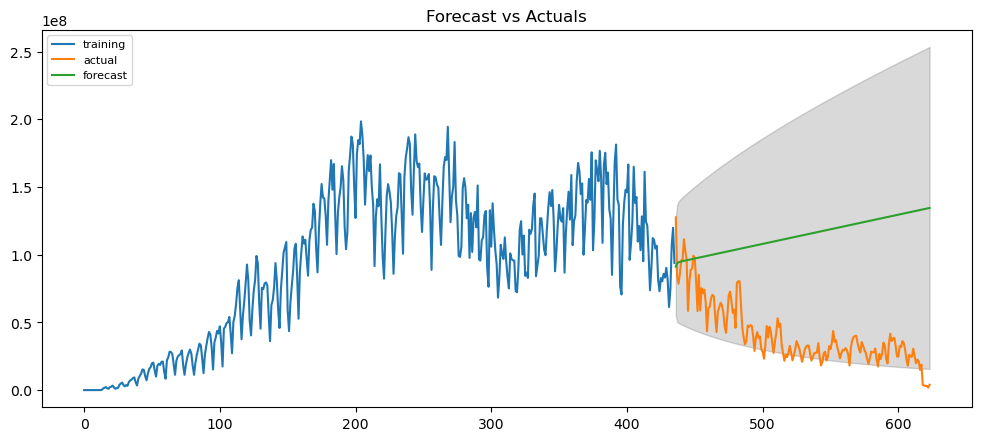

In [71]:
arima(1,1,2)